# Assignment 1 - DL course
Dataset objective:


In [2]:
!pip install -r requirements.txt

  Using cached numpy-2.4.2-cp313-cp313-macosx_14_0_arm64.whl.metadata (6.6 kB)
  Using cached pandas-3.0.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (79 kB)
  Using cached scikit_learn-1.8.0-cp313-cp313-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached tensorflow-2.20.0-cp313-cp313-macosx_12_0_arm64.whl.metadata (4.5 kB)
  Using cached matplotlib-3.10.8-cp313-cp313-macosx_11_0_arm64.whl.metadata (52 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached absl_py-2.4.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.12.19-py2.py3-none-any.whl.metadata (1.0 kB)
  Using cached gast-0.7.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-ma

## Imports

In [2]:
# Set random seeds for reproducible results
import numpy as np
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

# Data processing and visualization
import numpy as np                           # Numerical computing
import pandas as pd                          # Data manipulation
from sklearn.model_selection import train_test_split  # Split data into train/test
from sklearn.preprocessing import StandardScaler    # Scale features (normalize values)
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score  # Evaluation metrics

# Deep learning
from tensorflow.keras import models, layers  # Build neural network
from tensorflow.keras.optimizers import Adam  # Optimizer for training
from tensorflow.keras.callbacks import EarlyStopping  # Stop training when validation loss plateaus
from tensorflow.keras.callbacks import ReduceLROnPlateau  # Reduce learning rate when validation loss plateaus

# Visualization
import matplotlib.pyplot as plt              # Plot training curves and results
import seaborn as sns                        # Enhanced visualizations

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


In [3]:
# upload data to a dataframe
data = pd.read_csv('diabetes.csv')
print("✓ Data loaded successfully!")


✓ Data loaded successfully!


## Data Preprocessing

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

/var/folders/f8/qgzy7jnx32b4ff0l5wwh1twh0000gn/T/ipykernel_50118/3878289227.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=data, palette={'0': 'skyblue', '1': 'lightcoral'})


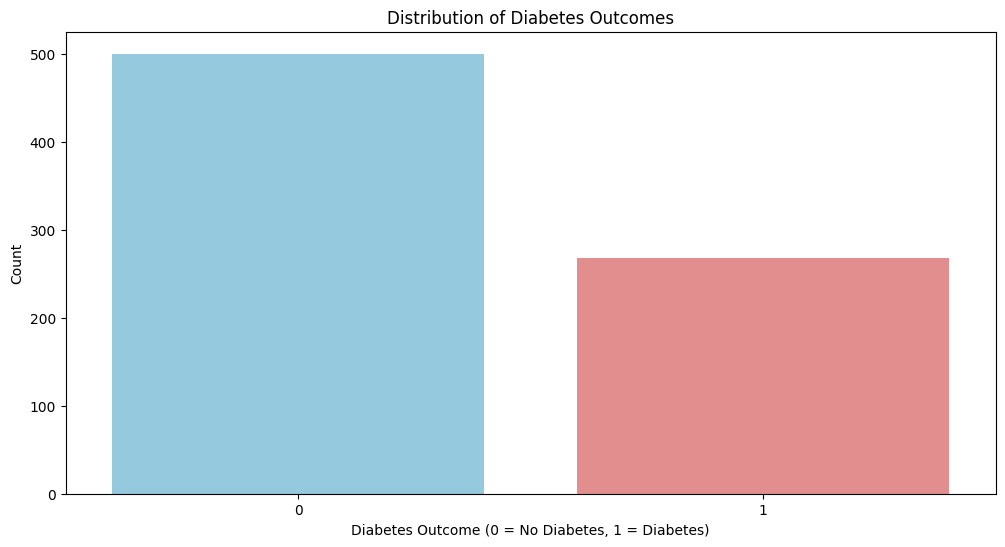

In [ ]:
# data distribution plot
plt.figure(figsize=(12, 6))
sns.countplot(x='Outcome', data=data, palette={'0': 'skyblue', '1': 'lightcoral'})
plt.title('Distribution of Diabetes Outcomes')
plt.xlabel('Diabetes Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Count')
plt.show()

we can see that there is an imbalance between the classes we probably have to accont for this when creating the model

In [12]:
imbalance_difference = data['Outcome'].value_counts()[0] - data['Outcome'].value_counts()[1]
print(f"✓ Class imbalance difference: {imbalance_difference}")

✓ Class imbalance difference: 232


In [20]:
# Explore the dataset structure
print("=" * 70)
print("DIABETES DATASET EXPLORATION")
print("=" * 70)

print(f"\nTotal samples: {data.shape[0]}")
print(f"Total features: {data.shape[1] - 1}")

print(f"\nFeatures represent clinical measurements:")
print(f"  • Pregnancies (number of times pregnant)")
print(f"  • Glucose (plasma glucose concentration)")
print(f"  • Blood Pressure (diastolic blood pressure in mmHg)")
print(f"  • Skin Thickness (triceps skin fold thickness in mm)")
print(f"  • Insulin (2-hour serum insulin in mu U/ml)")
print(f"  • BMI (body mass index)")
print(f"  • Diabetes Pedigree Function (genetic diabetes influence)")
print(f"  • Age (age in years)")

print(f"\nClass Distribution:")
print(f"  No Diabetes (0): {np.sum(data['Outcome'] == 0)} samples ({100*np.sum(data['Outcome']==0)/len(data):.1f}%)")
print(f"  Diabetes (1): {np.sum(data['Outcome'] == 1)} samples ({100*np.sum(data['Outcome']==1)/len(data):.1f}%)")

print(f"\nFeature Value Ranges:")
print(f"  Min values: {data.iloc[:, :-1].min().values[:5]}")
print(f"  Max values: {data.iloc[:, :-1].max().values[:5]}")
print(f"  Note: Features have very different scales → MUST normalize!")

print(f"\nFirst 5 patients (first 5 features):")
print(f"  Pregnancies | Glucose | Blood Pressure | Skin Thickness | Insulin")
for i in range(5):
    print(f"      {data.iloc[i, 0]:.0f}      |   {data.iloc[i, 1]:.0f}   |       {data.iloc[i, 2]:.0f}       |        {data.iloc[i, 3]:.0f}        |    {data.iloc[i, 4]:.0f}")

DIABETES DATASET EXPLORATION

Total samples: 768
Total features: 8

Features represent clinical measurements:
  • Pregnancies (number of times pregnant)
  • Glucose (plasma glucose concentration)
  • Blood Pressure (diastolic blood pressure in mmHg)
  • Skin Thickness (triceps skin fold thickness in mm)
  • Insulin (2-hour serum insulin in mu U/ml)
  • BMI (body mass index)
  • Diabetes Pedigree Function (genetic diabetes influence)
  • Age (age in years)

Class Distribution:
  No Diabetes (0): 500 samples (65.1%)
  Diabetes (1): 268 samples (34.9%)

Feature Value Ranges:
  Min values: [0. 0. 0. 0. 0.]
  Max values: [ 17. 199. 122.  99. 846.]
  Note: Features have very different scales → MUST normalize!

First 5 patients (first 5 features):
  Pregnancies | Glucose | Blood Pressure | Skin Thickness | Insulin
      6      |   148   |       72       |        35        |    0
      1      |   85   |       66       |        29        |    0
      8      |   183   |       64       |        0

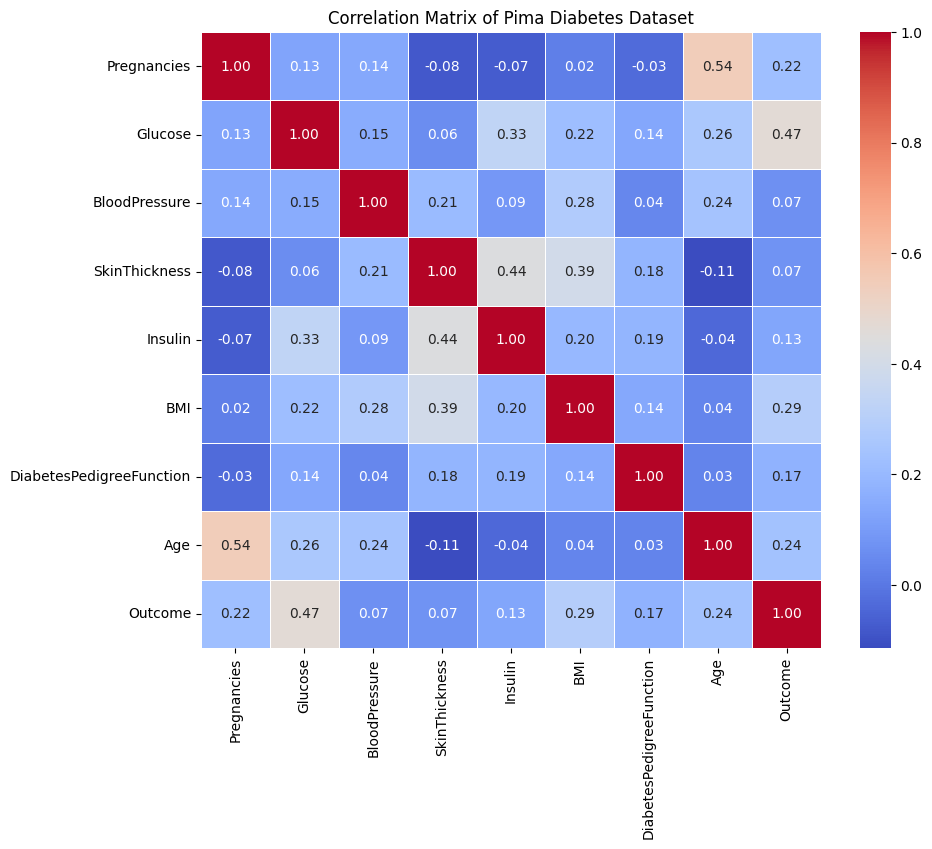

In [13]:
# target correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Pima Diabetes Dataset')
plt.show()

/var/folders/f8/qgzy7jnx32b4ff0l5wwh1twh0000gn/T/ipykernel_50118/2221636206.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=data, palette={'0': 'skyblue', '1': 'lightcoral'})
/var/folders/f8/qgzy7jnx32b4ff0l5wwh1twh0000gn/T/ipykernel_50118/2221636206.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=data, palette={'0': 'skyblue', '1': 'lightcoral'})
/var/folders/f8/qgzy7jnx32b4ff0l5wwh1twh0000gn/T/ipykernel_50118/2221636206.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='

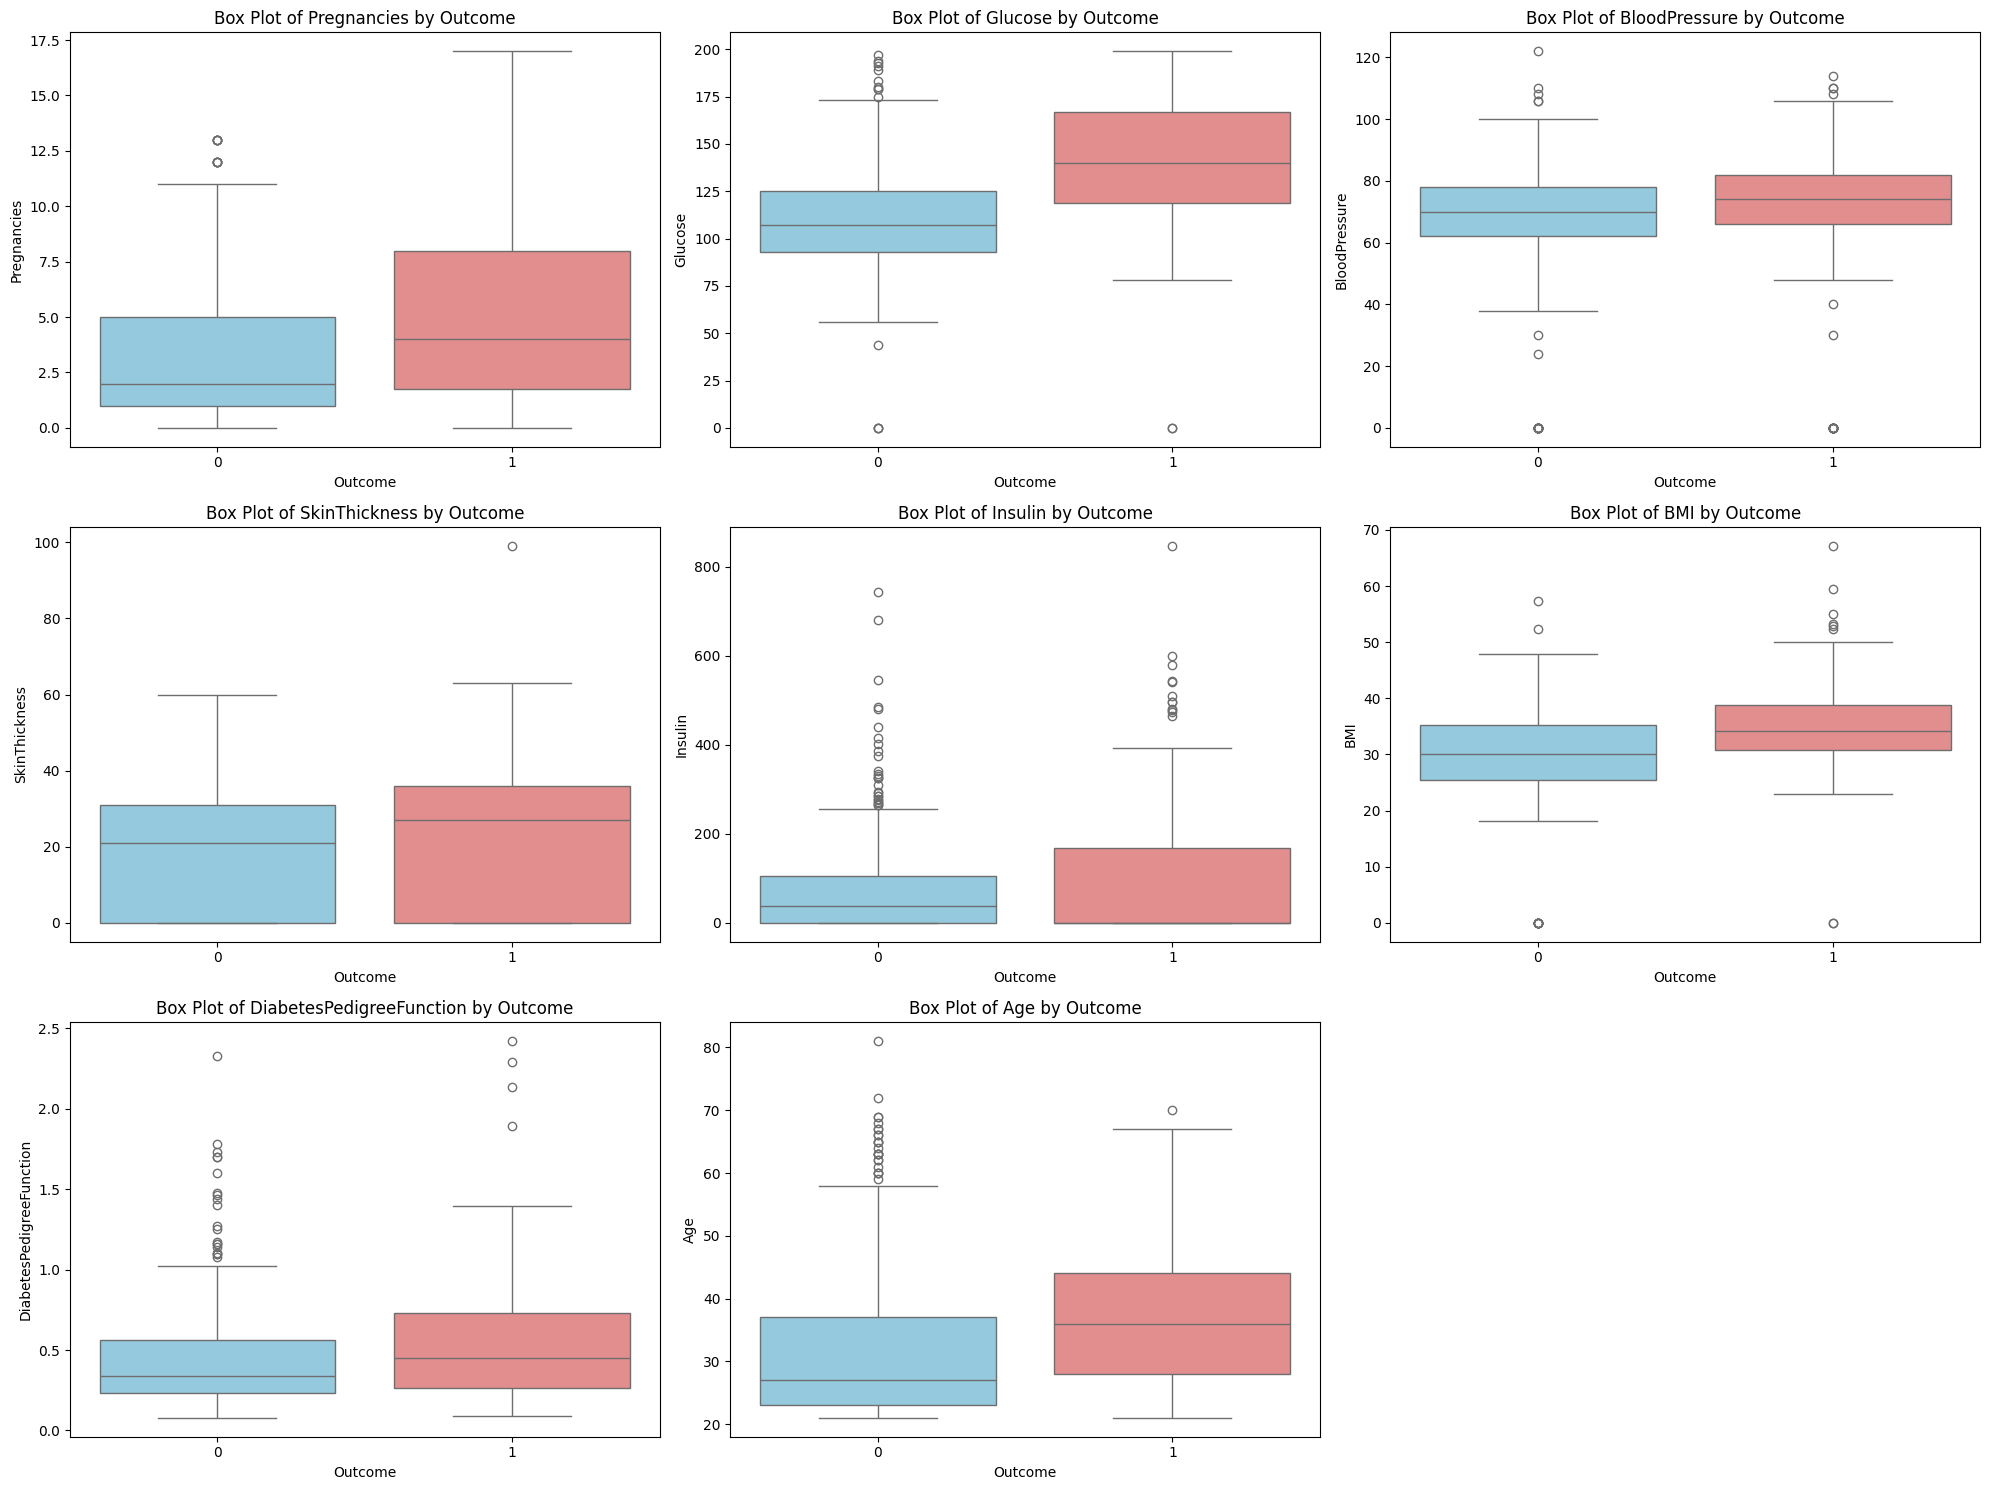

In [14]:
# bpx plots for each feature
features = data.columns[:-1]  # Exclude the target variable 'Outcome'
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Outcome', y=feature, data=data, palette={'0': 'skyblue', '1': 'lightcoral'})
    plt.title(f'Box Plot of {feature} by Outcome')
plt.tight_layout()
plt.show()

from the box plots we can observe there are many outliers that should be removed, I will probably gor for z-score outlier removal.

In [15]:
# removing outliers using z-score method
from scipy import stats
z_scores = np.abs(stats.zscore(data[features]))
outliers = (z_scores > 3).any(axis=1)
data_cleaned = data[~outliers]
print(f"✓ Removed {outliers.sum()} outliers from the dataset.")

✓ Removed 80 outliers from the dataset.


/var/folders/f8/qgzy7jnx32b4ff0l5wwh1twh0000gn/T/ipykernel_50118/4003383906.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=data_cleaned, palette={'0': 'skyblue', '1': 'lightcoral'})
/var/folders/f8/qgzy7jnx32b4ff0l5wwh1twh0000gn/T/ipykernel_50118/4003383906.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=feature, data=data_cleaned, palette={'0': 'skyblue', '1': 'lightcoral'})
/var/folders/f8/qgzy7jnx32b4ff0l5wwh1twh0000gn/T/ipykernel_50118/4003383906.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

 

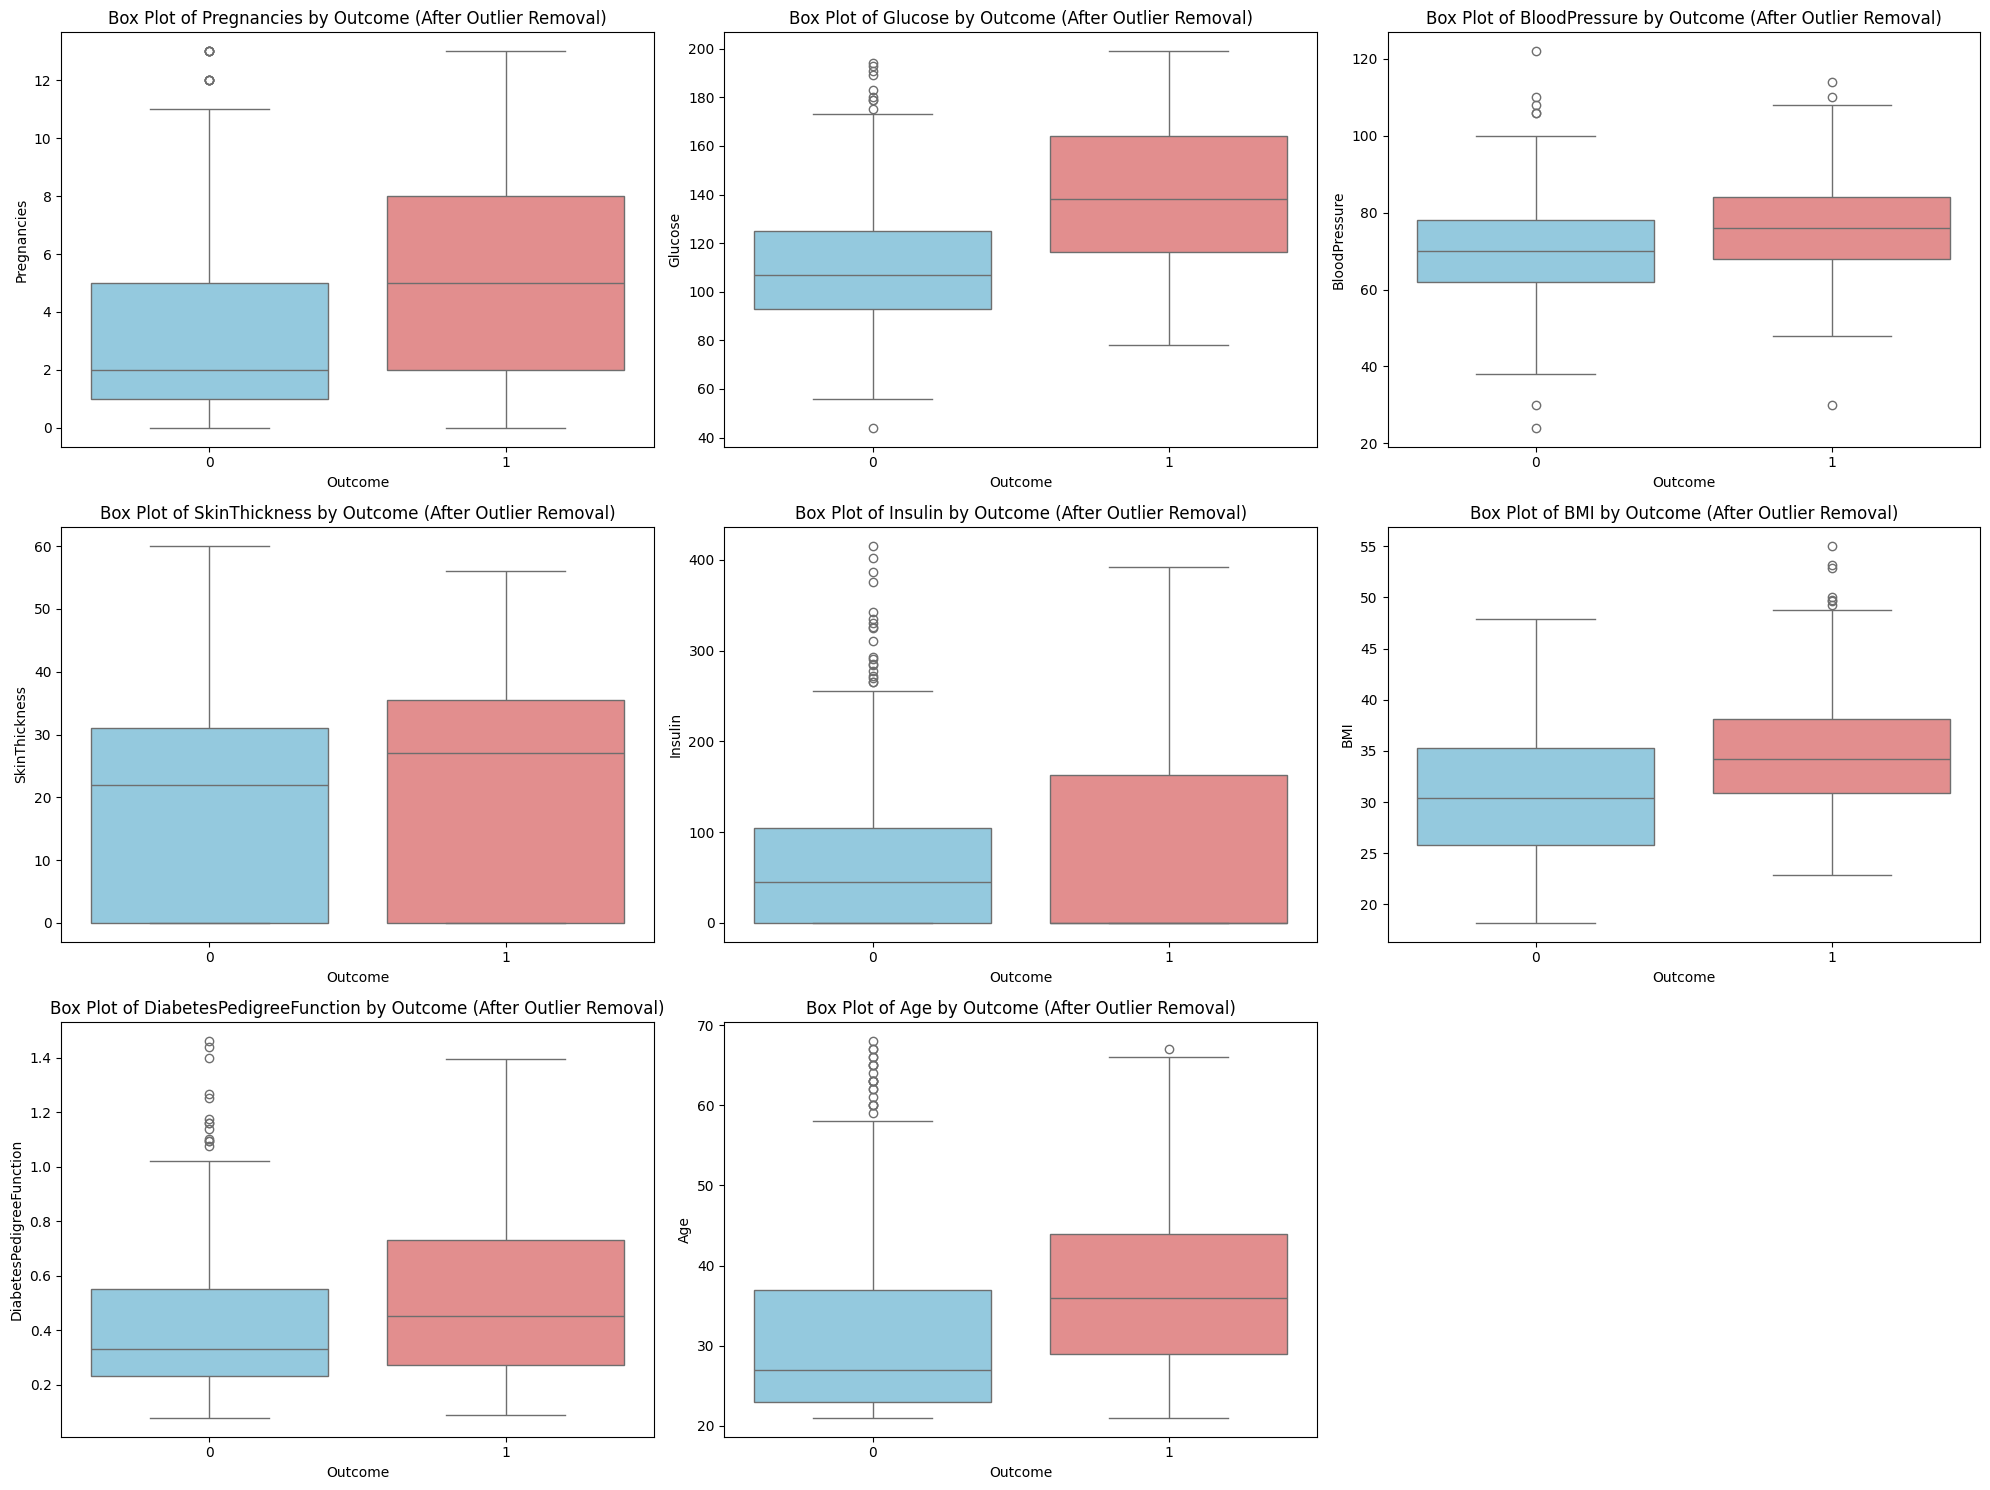

In [16]:
# box plots after outlier removal
features = data_cleaned.columns[:-1]  # Exclude the target variable 'Outcome'
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Outcome', y=feature, data=data_cleaned, palette={'0': 'skyblue', '1': 'lightcoral'})
    plt.title(f'Box Plot of {feature} by Outcome (After Outlier Removal)')
plt.tight_layout()
plt.show()

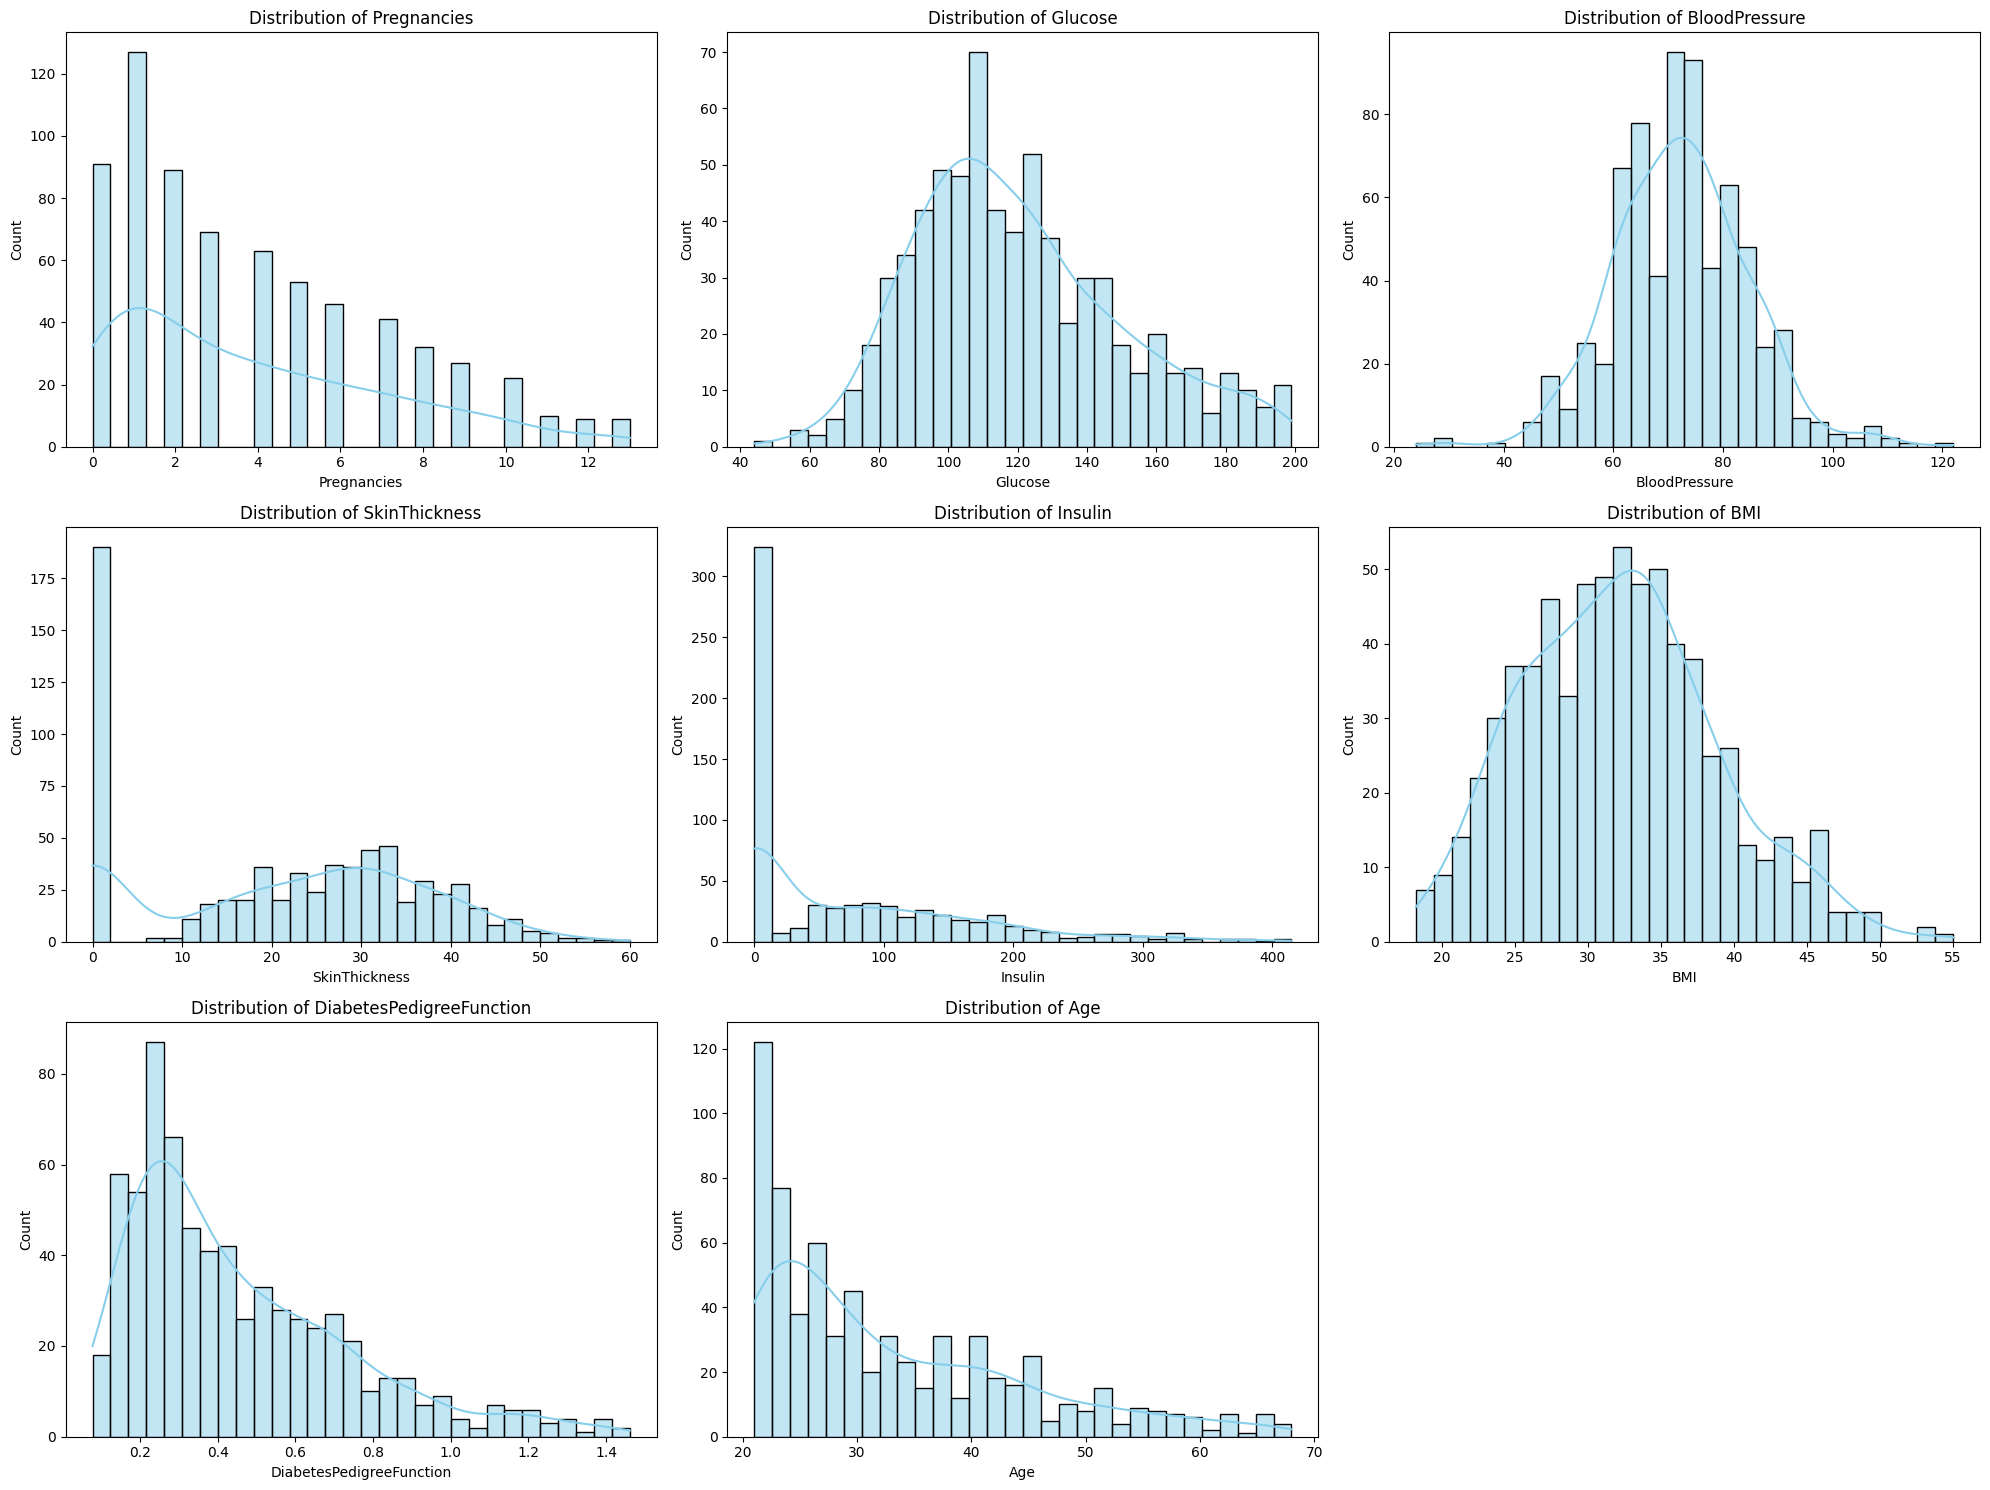

In [17]:
# feature distribution 
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data_cleaned[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

Based on the data distribution graphs we should normailze the features to have better feature distribution

In [18]:
# data normalization
scaler = StandardScaler()
X = data_cleaned.drop('Outcome', axis=1)
y = data_cleaned['Outcome']
X_scaled = scaler.fit_transform(X)

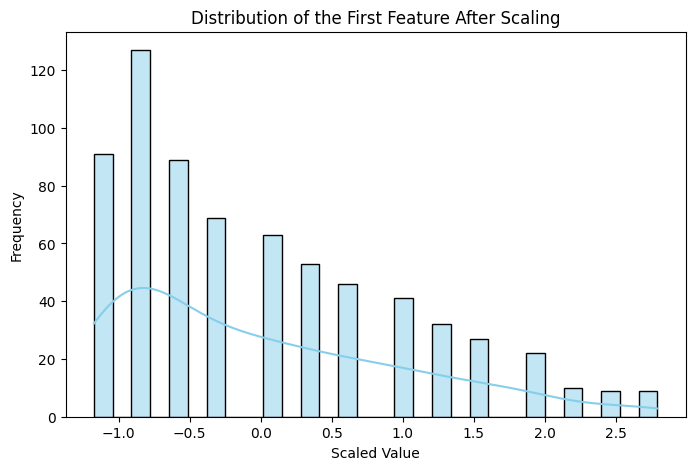

In [19]:
# plotting the distribution of the first feature after scaling
plt.figure(figsize=(8, 5))
sns.histplot(X_scaled[:, 0], kde=True, bins=30, color='skyblue')
plt.title('Distribution of the First Feature After Scaling')
plt.xlabel('Scaled Value')
plt.ylabel('Frequency')
plt.show()

✓ Data split complete:
  Training set: 550 samples
  Test set: 138 samples

✓ Class weights computed:
  No Diabetes (0): 0.745
  Diabetes (1): 1.519

✓ SMOTE applied to training data:
  Before - No Diabetes: 369, Diabetes: 181
  After  - No Diabetes: 369, Diabetes: 369


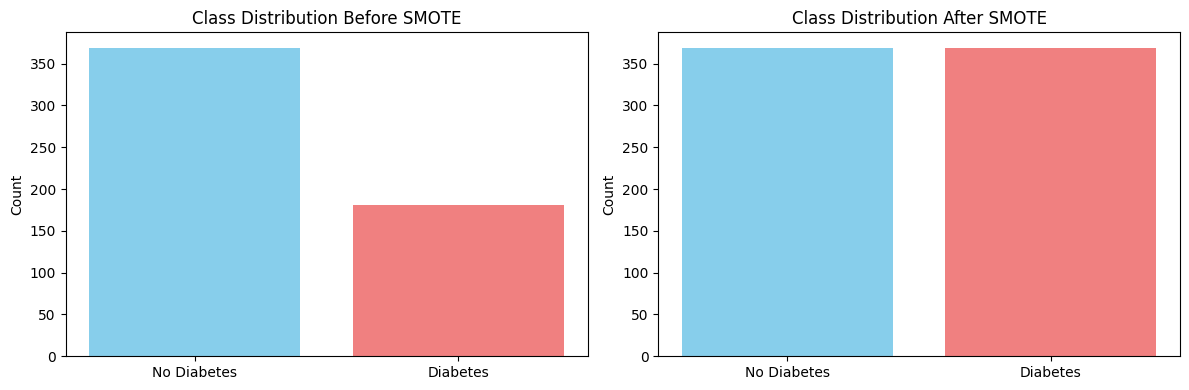

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE

# Spliting data into train/test BEFORE resampling
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"✓ Data split complete:")
print(f"  Training set: {X_train.shape[0]} samples")
print(f"  Test set: {X_test.shape[0]} samples")

# Strategy 1: Compute class weights for training
class_weights = compute_class_weight('balanced', 
                                      classes=np.unique(y_train), 
                                      y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print(f"\n✓ Class weights computed:")
print(f"  No Diabetes (0): {class_weights[0]:.3f}")
print(f"  Diabetes (1): {class_weights[1]:.3f}")

# Strategy 2: Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(f"\n✓ SMOTE applied to training data:")
print(f"  Before - No Diabetes: {np.sum(y_train==0)}, Diabetes: {np.sum(y_train==1)}")
print(f"  After  - No Diabetes: {np.sum(y_train_smote==0)}, Diabetes: {np.sum(y_train_smote==1)}")

# Visualize the rebalancing
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.bar(['No Diabetes', 'Diabetes'], [np.sum(y_train==0), np.sum(y_train==1)], color=['skyblue', 'lightcoral'])
ax1.set_title('Class Distribution Before SMOTE')
ax1.set_ylabel('Count')

ax2.bar(['No Diabetes', 'Diabetes'], [np.sum(y_train_smote==0), np.sum(y_train_smote==1)], color=['skyblue', 'lightcoral'])
ax2.set_title('Class Distribution After SMOTE')
ax2.set_ylabel('Count')
plt.tight_layout()
plt.show()

## Model Creation

In [ ]:
model = models.Sequential([
    layers.Dense(12, activation='relu', input_shape=(X_train.shape[1],)),  # Hidden layer 1
    layers.Dense(8, activation='relu'),                                     # Hidden layer 2
    layers.Dense(1, activation='sigmoid')                                   # Output: binary classification
])

/Users/hamzaelghonemy/Desktop/University/Senior/Deep Learning/neural-network-diabetes/.venv/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callbacks for better training
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model (with class weights)
history = model.fit(X_train, y_train,
                    epochs=150,
                    batch_size=32,
                    validation_split=0.2,  # 20% of train for validation
                    class_weight=class_weight_dict,
                    callbacks=[early_stopping, reduce_lr],
                    verbose=1)

# #model.fit(X_train_smote, y_train_smote,  # Use SMOTE data
#           epochs=50,
#           batch_size=32,
#           validation_split=0.2,
#           callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])

Epoch 1/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6432 - loss: 0.7806 - val_accuracy: 0.7000 - val_loss: 0.6362 - learning_rate: 0.0010
Epoch 2/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6409 - loss: 0.7365 - val_accuracy: 0.6727 - val_loss: 0.6225 - learning_rate: 0.0010
Epoch 3/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6341 - loss: 0.7024 - val_accuracy: 0.6727 - val_loss: 0.6123 - learning_rate: 0.0010
Epoch 4/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6636 - loss: 0.6752 - val_accuracy: 0.6818 - val_loss: 0.6033 - learning_rate: 0.0010
Epoch 5/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6727 - loss: 0.6531 - val_accuracy: 0.7000 - val_loss: 0.5939 - learning_rate: 0.0010
Epoch 6/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6886 - loss: 0.6344 - val_accuracy: 0.6909 - val_loss: 0.5841 - learning_rate: 0.0010
Epoch 7/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6909 - loss: 0.6184 - val_acc

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Test Accuracy: 0.7536
Precision: 0.6111
Recall: 0.7174
F1 Score: 0.6600


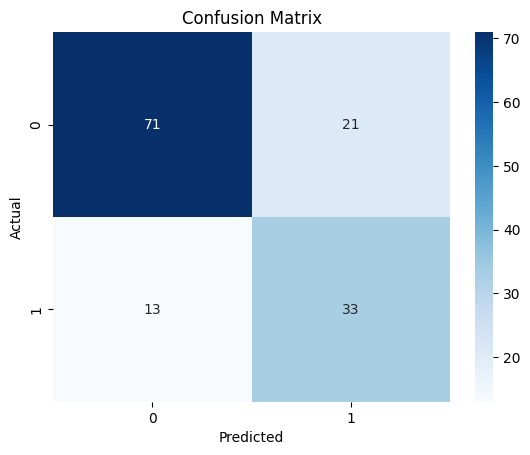

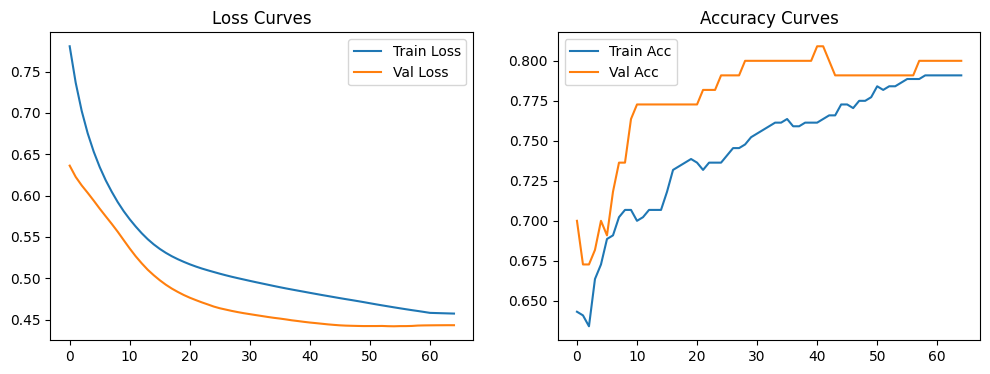

In [26]:
# Evaluate on test set
from sklearn.metrics import accuracy_score


y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Threshold for binary preds

# Metrics
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curves')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Curves')
plt.legend()
plt.show()